In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
festivales_bcn_21 = pd.read_pickle("./data/festivales_bcn_21_procesado.pkl")

In [66]:
categoricas_festivales = [
    "Ambit",
    "Titularidad",
    "NomDelFestival",
    "Mes",
    "Estacion",
    "Entrada"
]

In [67]:
categoricas_destacadas = [
    'Ambit', 
    'Titularidad', 
    'Mes', 
    'Estacion',
    "Entrada"
]

In [68]:
columnas_numericas_fests = [
    "Edicio",
    "Asistentes"
]

Funciones análisis

In [69]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    # Filtra solo las columnas que están en categoricas_destacadas
    columnas_categoricas = [col for col in columnas_categoricas if col in categoricas_destacadas]
    
    num_columnas = 2 
    num_filas = (len(columnas_categoricas) + num_columnas - 1) // num_columnas  # Calcula el número de filas necesario

    fig, axes = plt.subplots(num_filas, num_columnas, figsize=(15, 5 * num_filas))  # Ajusta el tamaño del subplot
    axes = axes.flatten()  # Aplanar el array de axes para un manejo más fácil

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if isinstance(df[col].iloc[0], list):  # Verificar si el elemento es una lista
            temp_df = df.explode(col)
        else:
            temp_df = df

        serie = temp_df[col].value_counts()
        if relativa:
            total = serie.sum()
            serie = serie.apply(lambda x: x / total)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            ax.set_ylabel('Frecuencia')

        # Usar la paleta 'viridis' y asignar 'x' a 'hue'
        sns.barplot(x=serie.index, y=serie, hue=serie.index, ax=ax, palette='viridis', legend=False)
        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')  # Ocultar ejes no utilizados

    plt.tight_layout()
    plt.show()

In [70]:
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [71]:
def plot_boxplot_grouped(df, column_to_plot, group_column):
    if df[column_to_plot].dtype in ['int64', 'float64'] and df[group_column].dtype in ['object', 'category']:
        sns.boxplot(data=df, x=group_column, y=column_to_plot)
        plt.show()

In [72]:
def get_IQR(df, col):
    return df[col].quantile(0.75) - df[col].quantile(0.25)

In [73]:
def variabilidad(df):
    df_var = df.describe().loc[["std", "mean"]].T
    df_var["CV"] = df_var["std"]/ df_var["mean"]
    return df_var

In [74]:
def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [75]:
def plot_combined_graphs(df, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()

Tendencia central

In [76]:
festivales_bcn_21.describe().loc["mean"]

Edicio           17.818182
Asistentes    23274.065217
Name: mean, dtype: float64

In [77]:
festivales_bcn_21.describe().loc["50%"]

Edicio           16.0
Asistentes    12399.5
Name: 50%, dtype: float64

In [78]:
festivales_bcn_21.describe().loc["max"]

Edicio            53.0
Asistentes    221000.0
Name: max, dtype: float64

In [79]:
festivales_bcn_21.describe().loc["min"]

Edicio          2.0
Asistentes    780.0
Name: min, dtype: float64

In [80]:
festivales_bcn_21[categoricas_destacadas].mode().T

,0
Ambit,Música
Titularidad,Privada
Mes,Noviembre
Estacion,Otoño


Comentarios <br>


Frecuencias relativa y absoluta

In [81]:
for catego in categoricas_destacadas:
    print(festivales_bcn_21[catego].value_counts())
    print("\n")

Ambit
Música                         14
Audiovisuals                   11
Multidisciplinaris i altres     8
Arts visuals                    5
Arts escèniques                 5
Lletres                         3
Name: count, dtype: int64


Titularidad
Privada    35
Pública    10
Mixta       1
Name: count, dtype: int64


Mes
Noviembre     10
Octubre        8
Enero          6
Junio          5
Mayo           4
Marzo          3
Septiembre     3
Julio          3
Abril          2
Diciembre      1
Agosto         1
Name: count, dtype: int64


Estacion
Otoño        21
Primavera    10
Invierno      9
Verano        6
Name: count, dtype: int64




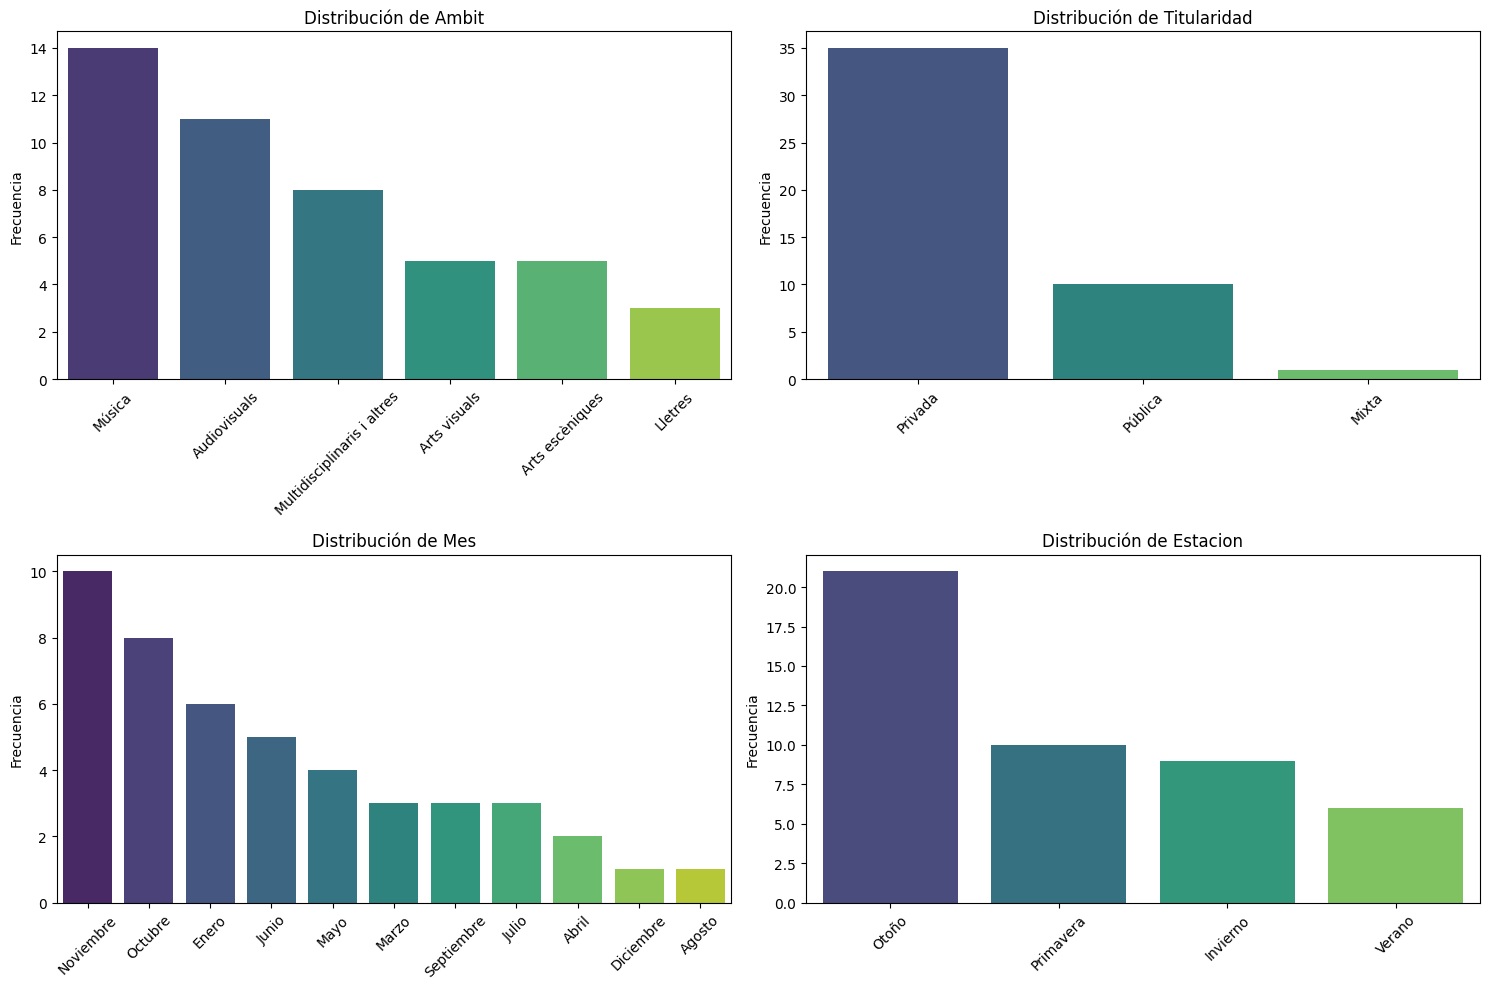

In [82]:
pinta_distribucion_categoricas(festivales_bcn_21, categoricas_destacadas)

Comentarios <br>


In [83]:
for catego in categoricas_destacadas:
    print(festivales_bcn_21[catego].value_counts()/len(festivales_bcn_21)*100)
    print("\n")

Ambit
Música                         30.434783
Audiovisuals                   23.913043
Multidisciplinaris i altres    17.391304
Arts visuals                   10.869565
Arts escèniques                10.869565
Lletres                         6.521739
Name: count, dtype: float64


Titularidad
Privada    76.086957
Pública    21.739130
Mixta       2.173913
Name: count, dtype: float64


Mes
Noviembre     21.739130
Octubre       17.391304
Enero         13.043478
Junio         10.869565
Mayo           8.695652
Marzo          6.521739
Septiembre     6.521739
Julio          6.521739
Abril          4.347826
Diciembre      2.173913
Agosto         2.173913
Name: count, dtype: float64


Estacion
Otoño        45.652174
Primavera    21.739130
Invierno     19.565217
Verano       13.043478
Name: count, dtype: float64




Comentarios <br>


Medidas de posición

In [84]:
festivales_bcn_21.describe()

,Edicio,Asistentes
count,44.000000,46.000000
mean,17.818182,23274.065217
std,11.215174,37939.953833
min,2.000000,780.000000
25%,10.000000,4975.500000
50%,16.000000,12399.500000
75%,25.250000,19919.250000
max,53.000000,221000.000000


In [85]:
get_IQR(festivales_bcn_21,"Edicio") 
# No es tanto mayor que la mediana (11), y casi igual que la media (mean)

15.25

In [86]:
print(festivales_bcn_21["Edicio"].quantile(0.5), "\n",
    festivales_bcn_21["Edicio"].quantile(0.9), "\n",
    festivales_bcn_21["Edicio"].quantile(0.95), "\n",
    festivales_bcn_21["Edicio"].max())

16.0 
 30.400000000000006 
 33.7 
 53.0


Comentarios <br>


In [87]:
get_IQR(festivales_bcn_21,"Asistentes") 
# Sí es mucho mayor que la mediana(2120). Hay mucha dispersión. Hay que tomar con cuidado la tendencia central

14943.75

In [88]:
print(festivales_bcn_21["Asistentes"].quantile(0.5), "\n",
    festivales_bcn_21["Asistentes"].quantile(0.9), "\n",
    festivales_bcn_21["Asistentes"].quantile(0.95), "\n",
    festivales_bcn_21["Asistentes"].max())

12399.5 
 49099.0 
 87984.75 
 221000.0


In [89]:
def total_asist(df):
    # Convertimos los valores de asistencia a float para asegurar la correcta suma
    df['Assistents_a_Barcelona'] = df['Assistents_a_Barcelona'].fillna(0).astype(float)
    df['Assistents_fora_de_Barcelona'] = df['Assistents_fora_de_Barcelona'].fillna(0).astype(float)

    # Sumamos los dos tipos de asistentes y aseguramos que el total tampoco tenga NaN
    df['Asistentes'] = df['Assistents_a_Barcelona'] + df['Assistents_fora_de_Barcelona']
    df['Asistentes'] = df['Asistentes'].fillna(0).astype(float)  # Convertir a float para asegurar el tipo de dato

    df.drop(['Assistents_a_Barcelona', 'Assistents_fora_de_Barcelona'], axis=1, inplace=True)

    df = df[df['Asistentes'] > 0]

    return df

Comentarios <br>


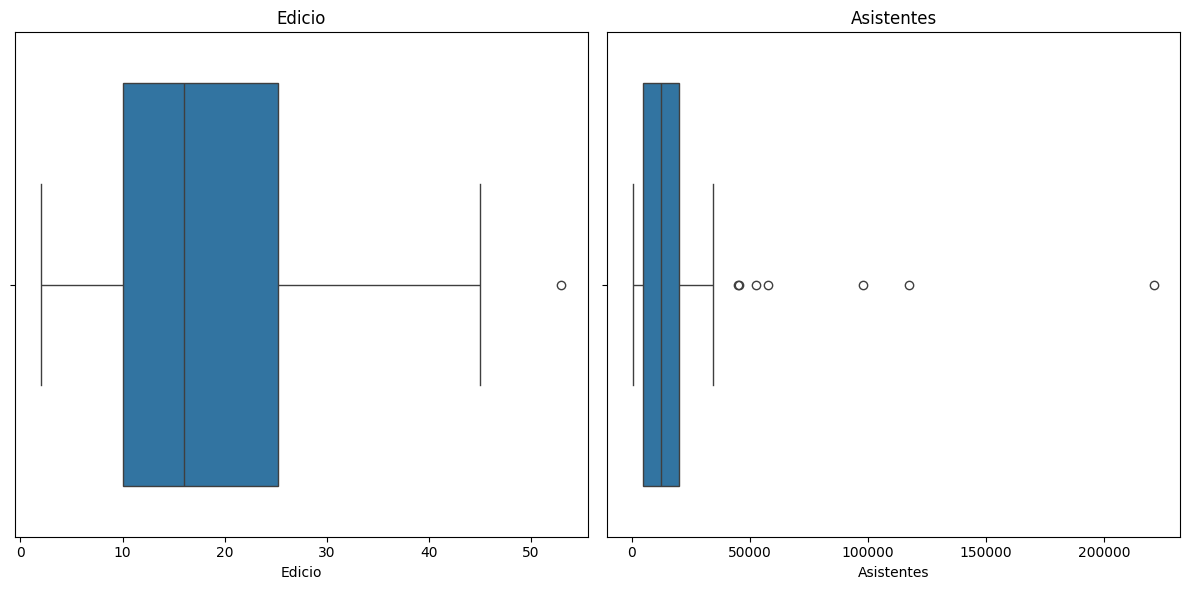

In [90]:
plot_multiple_boxplots(festivales_bcn_21, columnas_numericas_fests)

Comentarios <br>


In [91]:
plot_boxplot_grouped(festivales_bcn_21, "Edicio", "Asistentes")

# Por qué no consigo que se imprima esto????

Medidas de dispersión

In [92]:
festivales_bcn_21.describe().loc[["std", "mean"]].T

,std,mean
Edicio,11.215174,17.818182
Asistentes,37939.953833,23274.065217


In [93]:
variabilidad(festivales_bcn_21)
# Menos 15% es baja variabilidad, entre 15 y 30 es normal, más de 30 es alta = Es decir, todos tienen una altísima variabilidad! A ver visualmente...

,std,mean,CV
Edicio,11.215174,17.818182,0.629423
Asistentes,37939.953833,23274.065217,1.630139


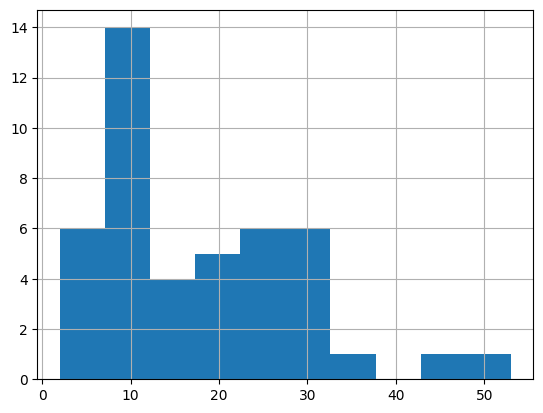

In [94]:
festivales_bcn_21["Edicio"].hist();

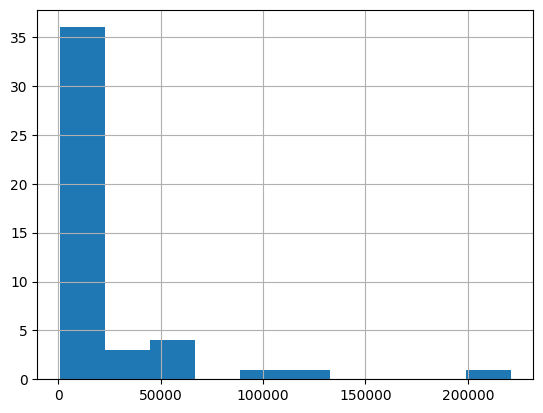

In [95]:
festivales_bcn_21["Asistentes"].hist();

Comentarios <br>


Distribución

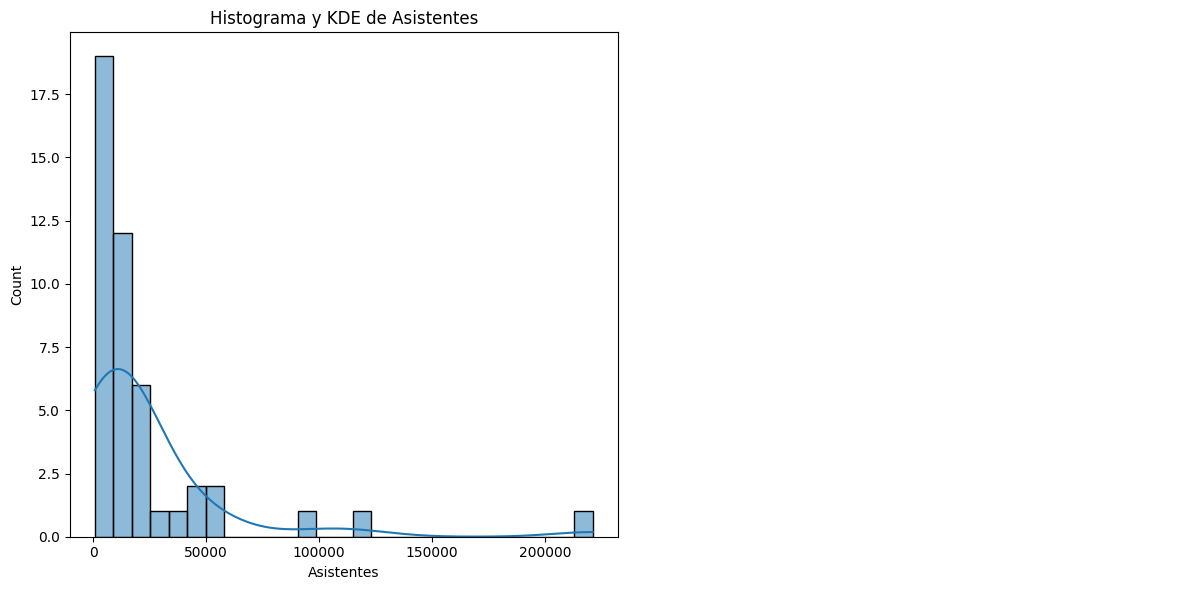

In [96]:
plot_histo_den(festivales_bcn_21, ["Asistentes"])

Anomalías outliers

(2,)


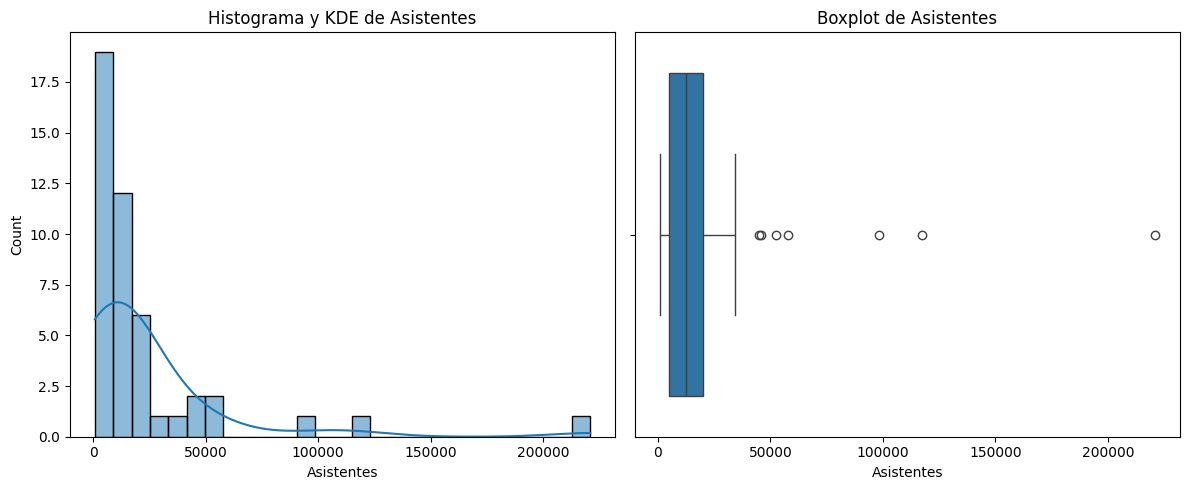

In [97]:
plot_combined_graphs(festivales_bcn_21, ["Asistentes"])

In [98]:
festivales_bcn_21

,Ambit,Edicio,NomDelFestival,Titularidad,Mes,Estacion,Asistentes,Entrada
1,Audiovisuals,8.0,Americana Film Fest,Privada,Marzo,Invierno,5948.0,De Pago
2,Arts visuals,8.0,Art Photo BCN,Privada,Junio,Primavera,15900.0,De Pago
3,Audiovisuals,9.0,Asian Film Festival,Privada,Octubre,Otoño,57867.0,De Pago
4,Música,29.0,BAM. Barcelona Acció Musical,Pública,Septiembre,Otoño,11199.0,Gratis
5,Arts visuals,16.0,Barcelona Design Week City Festival,Privada,Octubre,Otoño,34300.0,De Pago
6,Arts visuals,11.0,Barcelona Dibuixa,Pública,Octubre,Otoño,4901.0,Gratis
7,Multidisciplinaris i altres,10.0,Barcelona Districte Cultural,Pública,Octubre,Otoño,16751.0,Gratis
8,Multidisciplinaris i altres,2.0,Barcelona Festival de Nadal,Pública,Diciembre,Otoño,221000.0,Gratis
9,Arts visuals,7.0,Barcelona Gallery Weekend,Privada,Mayo,Primavera,13600.0,De Pago
10,Lletres,24.0,Barcelona Poesia,Pública,Mayo,Primavera,4884.0,Gratis
